# **Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setup the Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

## Loding Data

In [ ]:
path = 'drive/My Drive/Chatbot google colab/'

In [ ]:
df = pd.read_csv(path + '/Reviews.csv')
print(df.shape)
df = df.head(50000)
print(df.shape)

(568454, 10)
(50000, 10)


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Bar graph of the data

Text(0.5, 0, 'Review Stars')

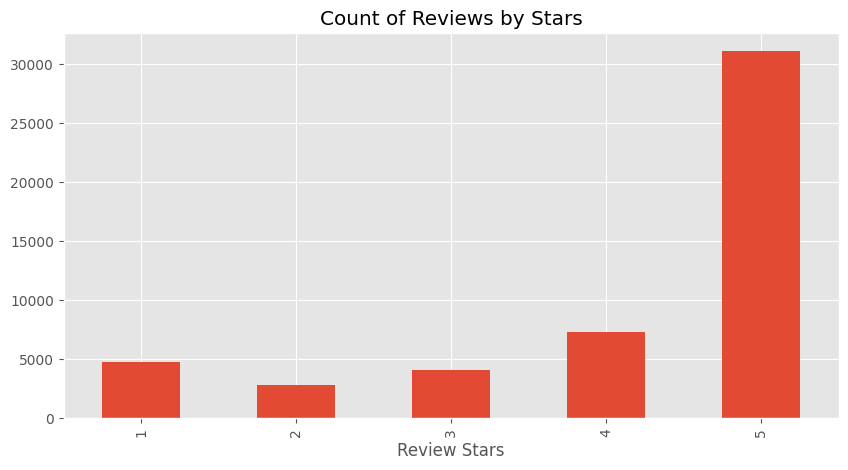

In [ ]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')

# **Sentiment Intensity Analyzer**

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

## Example of a Sentiment analysis

In [ ]:
example = df['Text'][5000]
print(example)

I thought I'd try the multi-pack to see which flavor I liked the best, but I like them all. They are healthy, fulfilling, and all good ingredients I can actually pronounce. These are the smaller packs, and now I can proceed to ordering the larger bags. Love these cookies!


In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.9692}

## Running polarity score on the entire dataset

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


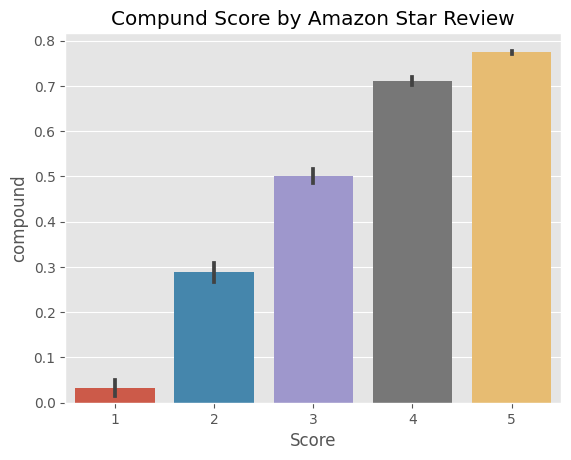

In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

## Segregating sentiments based on Rating

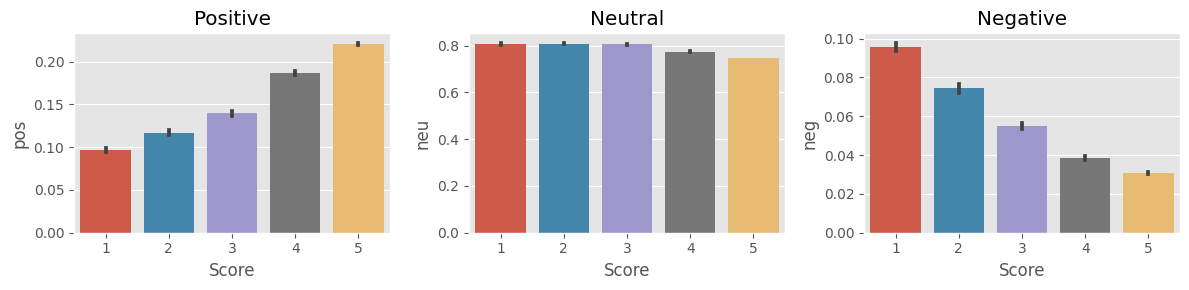

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# **Chatbot**

## Example sentences


## **Use 'exit', 'quit', 'bye', to end the bot**

**Positive:**

I love my new job!<br>
This is the best pizza I've ever had.<br>
I'm so grateful for my friends and family.<br>
I'm having a wonderful day.<br>
The weather is perfect today.<br>

**Negative:**

I'm having a really bad day.<br>
I hate this traffic.<br>
I'm so stressed out.<br>
This food is terrible.<br>
I'm so disappointed.<br>

**Neutral:**

I'm feeling okay.<br>
The weather is alright.<br>
This food is edible.<br>
I'm not sure how I feel about this.<br>
I'm just taking things one day at a time.<br>

## Chat bot

Install required Libraries

In [ ]:
import locale
print(locale.getpreferredencoding())

UTF-8


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install transformers accelerate einops torch

In [ ]:
# Load the text generation model and tokenizer
tokenizer = AutoTokenizer.from_pretrained(
    "h2oai/h2ogpt-gm-oasst1-en-2048-falcon-7b-v2",
    use_fast=False,
    padding_side="left",
    trust_remote_code=True,
)

generate_text = pipeline(
    model="h2oai/h2ogpt-gm-oasst1-en-2048-falcon-7b-v2",
    tokenizer=tokenizer,
    torch_dtype=torch.float16,
    trust_remote_code=True,
    use_fast=False,
    device_map={"": "cuda:0"},
)

In [ ]:
import torch
from transformers import AutoTokenizer, pipeline
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Load the sentiment analysis model
sia = SentimentIntensityAnalyzer()

def get_sentiment_label(text):
    sentiment_score = sia.polarity_scores(text)
    compound_score = sentiment_score['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Function to generate a response based on sentiment and user input
def generate_response(sentiment_label, user_input):
    response = generate_text(
        f"{user_input} {sentiment_label} sentiment.",
        min_new_tokens=2,
        max_new_tokens=1024,
        do_sample=False,
        num_beams=1,
        temperature=float(0.3),
        repetition_penalty=float(1.2),
        renormalize_logits=True
    )
    return response[0]['generated_text']

# Main chat loop
print("Sentiment Analysis and Text Generation Chatbot")
while True:
    user_input = input("You: ")

    if user_input.lower() in ['exit', 'quit', 'bye']:
        print("Chatbot: Goodbye!")
        break

    # Analyze sentiment
    sentiment_label = get_sentiment_label(user_input)

    # Generate response based on sentiment and user input
    response = generate_response(sentiment_label, user_input)

    print(f"Chatbot: The sentiment of your input is {sentiment_label}")
    print(f"Chatbot: {response}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Analysis and Text Generation Chatbot
You: If you could have dinner with any fictional character, who would it be?


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.3` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Chatbot: As an AI language model, I don't have personal preferences or opinions. However, if I were to choose a fictional character to have dinner with, it would probably be Harry Potter from the "Harry Potter" series by J.K. Rowling. He is a brave and intelligent young man who has overcome many challenges in his life and achieved great success despite facing adversity. His story of overcoming obstacles and achieving his goals through determination and hard work makes him an inspiring figure. Plus, he's a wizard, so we could have some fun magical adventures together!
You: bye
Chatbot: Goodbye!
